### Created By: Mrinal Bhan


In [4]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

### Function to capture a frame from a video at a random timestamp

In [18]:
def capture_random_frame(video_path, output_image_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Randomly capture a single frame
    random_frame_no = random.randint(0, total_frames - 1)
    cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_no)

    # Capture a single frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not capture a frame.")
        cap.release()
        return

    # Close the video file
    cap.release()

    # Display the captured frame using Matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Save the captured frame to a file
    cv2.imwrite(output_image_path, frame)


### Image1 and Video1

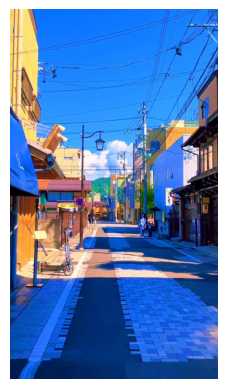

In [19]:
capture_random_frame('video1.mp4', 'image1.jpg')

### Image2 and Video2

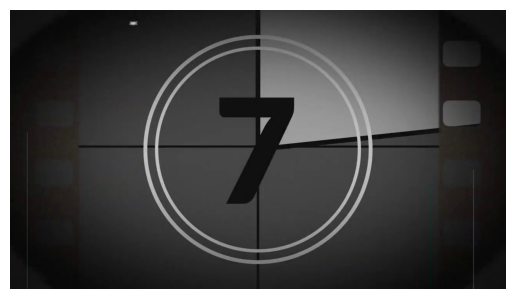

In [25]:
capture_random_frame('video2.mp4', 'image2.jpg')

### Check whether the frame is present in the video

In [36]:
def match_screenshot_to_video(screenshot_path, video_path, match_threshold=2):
    # Load the screenshot
    screenshot = cv2.imread(screenshot_path)

    if screenshot is None:
        print("Error: Could not load the screenshot image.")
        return

    # Create an ORB (Oriented FAST and Rotated BRIEF) detector
    orb = cv2.ORB_create()

    # Load the video and prepare it for frame comparison
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    # Initialize a brute force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Initialize a variable to track if the screenshot matches any frame
    match_found = False

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        # Find keypoints and descriptors in the video frame and screenshot
        kp1, des1 = orb.detectAndCompute(frame, None)
        kp2, des2 = orb.detectAndCompute(screenshot, None)

        # Match the descriptors using BFMatcher
        matches = bf.match(des1, des2)

        # Sort the matches by distance
        matches = sorted(matches, key=lambda x: x.distance)

        if len(matches) > match_threshold:
            match_found = True
            print("Match found in the video!")
            break

    if not match_found:
        print("No match found in the video.")

    # Release the video capture object
    cap.release()



### Match Image1 and Video1

In [21]:
match_screenshot_to_video('image1.jpg', 'video1.mp4')

Match found in the video!


### Match Image2 and Video1

In [42]:
match_screenshot_to_video('image2.jpg', 'video1.mp4')

No match found in the video.
